In [ ]:
%load_ext load_style
%load_style talk.css
from IPython.display import Image
from talktools import website

# Machine Learning with scikit-learn

Broadly speaking, Machine Learning is a field, related to Artificial Intelligence (AI), concerned about developping algorithms that 'learn from data', i.e. automatically adjust their performance from exposure to information encoded in data. This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

There are two major classes of ML (actually 3 with [**reinforcement learning**](http://en.wikipedia.org/wiki/Reinforcement_learning)): 

[**Supervised learning**](http://en.wikipedia.org/wiki/Supervised_learning)
: Algorithms which learn from a training set of *labeled* examples to generalize to the set of all possible inputs. 

There are two classes of supervised learning algorithms: 

1. [**classification**](http://en.wikipedia.org/wiki/Classification_(machine_learning): when the label is encoded into a discrete, categorical variable (a *class*, a *label*). Example of a classification algorithm is the [Support Vector Machine](http://en.wikipedia.org/wiki/Support_vector_machine)

2. [**regression**](http://en.wikipedia.org/wiki/Regression_analysis): when the label is encoded into a continuous variable. Example of a regression is the simple [linear regression](http://en.wikipedia.org/wiki/Linear_regression_model). 

[**Unsupervised learning**](http://en.wikipedia.org/wiki/Unsupervised_learning)
: Algorithms which learn from a training set of *unlabeled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. 

One can also divide Unsupervised learning algorithms into: 

1. [**Dimensionality reduction**](http://en.wikipedia.org/wiki/Dimensionality_reduction): learning a more compact  representation (i.e. reducing the dimensions) of the data. One example is [Principal Component Analysis](http://en.wikipedia.org/wiki/Principal_component_analysis) (or Empirical Orthogonal Functions decomposition) 
2. [**Clustering**](http://en.wikipedia.org/wiki/Cluster_analysis): separating the data into clusters. One example of widely used algorithm is the [k-means](http://en.wikipedia.org/wiki/K-means) clustering method.

### Some vocabulary 

+ ** Instance **: sample, observation
+ ** Feature **: explanatory variable, independent variable, predictor
+ ** target **: dependent variable, predictand, can be categorical (*label*, *class*) or continuous.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Image, HTML
%matplotlib inline

In [3]:
Image(url='http://scikit-learn.org/stable/_static/ml_map.png', width=700)

The [scikit-learn](http://scikit-learn.org/stable/) package is an open-source library that provides a robust set of machine learning algorithms for Python. It is built upon the core Python scientific stack (*i.e.* NumPy, SciPy, Cython), and has a simple, consistent API, making it useful for a wide range of statistical learning applications.

In [ ]:
#website('http://scikit-learn.org/stable/', width=1000)

### Representing Data in `scikit-learn`

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Here there are $N$ samples and $D$ features.
Several example datasets are available in the ``sklearn.datasets`` module

### The `scikit-learn` interface

A great feature about scikit-learn is the consistant API (Application Programmer Interface) which means that once you have learned how one particular algorithm is implemented in scikit-learn, using another algorithm will look very familiar. 

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: an **estimator** interface for building and ﬁtting models, a **predictor** interface for making predictions and a **transformer** interface for converting data.

The **estimator** interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (*e.g.*, for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

Scikit-learn strives to have a uniform interface across all methods; given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.
    
The **predictor** interface extends the notion of an estimator by adding a `predict` method that takes an array `X_test` and produces predictions based on the learned parameters of the estimator. In the case of supervised learning estimators, this method typically returns the predicted labels (for *classification*) or values (*regression) computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as k-means, where the predicted values are the cluster labels.

Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a **transformer** interface which deﬁnes a transform method. It takes as input some new data `X_test` and yields as output a transformed version. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

What we're going to do during this session is give an example of **supervised** learning, and more specifically we're going to see how to solve a **classification** problem in scikit-learn, with a focus on how one evaluates the performance of a model. 

We're going to use a dataset that comes with scikit-learn, which consists in representation of hand-written digits (8 x 8 pixels normalized images) with the associated label (the correct digit)

This example is treated in a more comprehensive manner by [Olivier Grisel](http://ogrisel.com/) (see his notebooks [here](https://github.com/ogrisel/parallel_ml_tutorial))

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [9]:
from sklearn import datasets

In [ ]:
datasets.

In [5]:
X, y = digits.data, digits.target

print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("labels: %r" % list(np.unique(y)))

data shape: (1797, 64), target shape: (1797,)
labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
def plot_gallery(data, labels, shape, interpolation='nearest'):
    f,ax = plt.subplots(1,5,figsize=(16,5))
    for i in range(data.shape[0]):
        ax[i].imshow(data[i].reshape(shape), interpolation=interpolation, cmap=plt.cm.gray_r)
        ax[i].set_title(labels[i])
        ax[i].set_xticks(()), ax[i].set_yticks(())

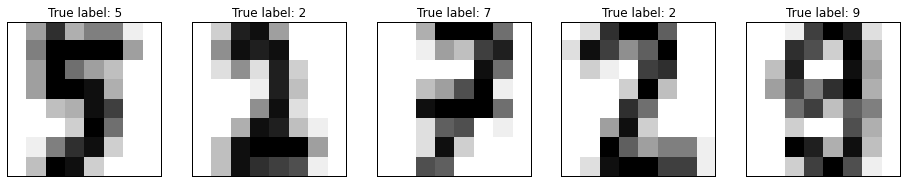

In [8]:
subsample = np.random.permutation(X.shape[0])[:5]
images = X[subsample]
labels = ['True label: %d' % l for l in y[subsample]]
plot_gallery(images, labels, shape=(8, 8))

### example of hand-written digit classification with Support Vector Machines (SVM)

We are importing the svm.SVC (Support Vector **Classifier** class) from scikit-learn

In [10]:
X.shape

(1797, 64)

In [13]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
from sklearn.svm import SVC

#### instanciation

In [16]:
svc = SVC()

In [17]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### fitting

In [18]:
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### scoring

In [19]:
svc.score(X,y)

1.0

#### prediction

In [20]:
y_hat = svc.predict(X)

In [21]:
np.alltrue(y_hat == y)

True

#### Have we got a perfect model ???

Here we are making an important methodological mistake: we are using **all the instances available** to **train** the model, and using the **same** instances to **evaluate** the model in terms of accuracy. It tell us (almost) nothing about the actual performance in production of the model, just how well it can reproduce the data it's been exposed too ...

A way to work around that is to train the model over a **subset** of the available instances (the **training set**), calculate the train score, and test the model (i.e. calculate the test score) over the remaining of the instances (the **test set**).

**Cross-validation** consists into repeating this operation several times using successive splits of the original dataset into training and test sets, and calculating a summary statistic of the train and test scores over the iterations (usually average).


Several splits can be used: 

+ **Random split**: a given percentage of the data is selected at random (with replacement) 	
+ **K-folds**: the dataset is divided into K exhaustive splits, each split is used as the test set, while the K-1 splits are using as the training set
+ **Stratified K-folds**:  for classification mainly. The folds are constructed so that the class distribution is approximately the same in each fold (e.g. the relative frequency of each class is preserved)
+ **Leave One Out**: like K-fold with K = 1. One instance is left out, the model is built on the N-1 remaining instances, this procedure is repeated until all the instances have been used.


### cross-validation in scikit-learn

In [22]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                test_size=0.25, random_state=1)

print("train data shape: %r, train target shape: %r"
      % (X_train.shape, y_train.shape))
print("test data shape: %r, test target shape: %r"
      % (X_test.shape, y_test.shape))

train data shape: (1347, 64), train target shape: (1347,)
test data shape: (450, 64), test target shape: (450,)


In [23]:
svc = SVC().fit(X_train, y_train)
train_score = svc.score(X_train, y_train) 
train_score

1.0

In [24]:
test_score = svc.score(X_test, y_test)
test_score

0.40888888888888891

Ok that seems more like a 'normal' result ...

- if the **test** data score is **not as good as** the **train** score the model is **overfitting**

- if the **train score is not close to 100%** accuracy the model is **underfitting**

Ideally **we want to neither overfit nor underfit**: `test_score ~= train_score ~= 1.0`. 

When setting up a Support Vector Machine classifier, one needs to set up 2 parameters (hyper-parameters) which are NOT tuned at the fitting stage (they are NOT learned). These are **C** and **$\gamma$** (see the [relevant section](http://en.wikipedia.org/wiki/Support_vector_machine#Parameter_selection) in the wikipedia article). What we did before is to instanciate the SVC class without specifying these parameters, which means that the default are used. Let's try something else. 

In [25]:
svc_2 = SVC(C=100, gamma=0.001).fit(X_train, y_train)
svc_2

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [26]:
svc_2.score(X_train, y_train)

1.0

In [27]:
svc_2.score(X_test, y_test)

0.99111111111111116

In [28]:
sum(svc_2.predict(X_test) == y_test) / float(len(y_test))

0.99111111111111116

Could be luck (we only used one train / test split here): Now we're going to use **cross validation** to  repeat the train / test split several times to as to get a more accurate estimate of the real test score by averaging the values found of the individual runs

scikit-learn provides a very convenient interface to do that: ```sklearn.cross_validation```

In [29]:
from sklearn import cross_validation

In [ ]:
cross_validation.

In [ ]:
cross_validation.ShuffleSplit?

In [30]:
cv = cross_validation.ShuffleSplit(len(X), n_iter=3, test_size=0.2,
    random_state=0)

for cv_index, (train, test) in enumerate(cv):
    print("# Cross Validation Iteration #%d" % cv_index)
    print("train indices: {0}...".format(train[:10]))
    print("test indices: {0}...".format(test[:10]))
    
    svc = SVC(C=100, gamma=0.001).fit(X[train], y[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(X[train], y[train]), svc.score(X[test], y[test])))

# Cross Validation Iteration #0
train indices: [1109  940  192  260 1148  966 1720  554  308  512]...
test indices: [1081 1707  927  713  262  182  303  895  933 1266]...
train score: 1.000, test score: 0.992

# Cross Validation Iteration #1
train indices: [1642  586  142   15  701  472  380 1405 1551  450]...
test indices: [1014  755 1633  117  181  501  948 1076   45  659]...
train score: 1.000, test score: 0.997

# Cross Validation Iteration #2
train indices: [ 396 1083 1184 1569  560 1502 1722 1162 1316 1685]...
test indices: [ 795  697  655  573  412  743  635  851 1466 1383]...
train score: 1.000, test score: 0.989



There's a wrapper for estimating cross validated scores directly, you just have to pass the cross validation method instanciated before

In [31]:
from sklearn.cross_validation import cross_val_score

svc = SVC(C=100, gamma=0.001)

cv = cross_validation.ShuffleSplit(len(X), n_iter=10, test_size=0.2,
    random_state=0)

test_scores = cross_val_score(svc, X, y, cv=cv, n_jobs=-1) # n_jobs = 4 if you have a quad-core machine ...
test_scores

array([ 0.99166667,  0.99722222,  0.98888889,  0.99722222,  0.98611111,
        0.99722222,  0.98611111,  0.99444444,  0.98611111,  0.99166667])

Cross validation can be used to estimate the best hyperparameters for a model

Let's see what happens when we fix C but vary $\gamma$

In [ ]:
n_iter = 5 # the number of iterations should be more than that ... 

gammas = np.logspace(-7, -1, 10) # should be more fine grained ... 

cv = cross_validation.ShuffleSplit(len(X), n_iter=n_iter, test_size=0.2)

train_scores = np.zeros((len(gammas), n_iter))
test_scores = np.zeros((len(gammas), n_iter))

for i, gamma in enumerate(gammas):
    for j, (train, test) in enumerate(cv):
        C = 1
        clf = SVC(C=C, gamma=gamma).fit(X[train], y[train])
        train_scores[i, j] = clf.score(X[train], y[train])
        test_scores[i, j] = clf.score(X[test], y[test])

In [ ]:
f, ax = plt.subplots(figsize=(12,8))
#for i in range(n_iter):
#    ax.semilogx(gammas, train_scores[:, i], alpha=0.2, lw=2, c='b')
#    ax.semilogx(gammas, test_scores[:, i], alpha=0.2, lw=2, c='g')
ax.semilogx(gammas, test_scores.mean(1), lw=4, c='g', label='test score')
ax.semilogx(gammas, train_scores.mean(1), lw=4, c='b', label='train score')

ax.grid()
ax.fill_between(gammas, train_scores.min(1), train_scores.max(1), color = 'b', alpha=0.2)
ax.fill_between(gammas, test_scores.min(1), test_scores.max(1), color = 'g', alpha=0.2)

ax.set_ylabel("score for SVC(C=%4.2f, $\gamma=\gamma$)" % ( C ),fontsize=16)
ax.set_xlabel(r"$\gamma$",fontsize=16)
best_gamma = gammas[np.argmax(test_scores.mean(1))]
best_score = test_scores.mean(1).max()
ax.text(best_gamma, best_score+0.05, "$\gamma$ = %6.4f | score=%6.4f" % (best_gamma, best_score),\
        fontsize=15, bbox=dict(facecolor='w',alpha=0.5))
[x.set_fontsize(16) for x in ax.xaxis.get_ticklabels()]
[x.set_fontsize(16) for x in ax.yaxis.get_ticklabels()]
ax.legend(fontsize=16,  loc=0)
ax.set_ylim(0, 1.1)
ax.grid()

### Grid-search

You can search the (hyper) parameter space and find the best hyperparameters using grid search in scikit-learn

In [ ]:
from sklearn.grid_search import GridSearchCV

In [ ]:
svc_params = {
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5),
}

In [ ]:
gs_svc = GridSearchCV(SVC(), svc_params, cv=3, n_jobs=4)

In [ ]:
gs_svc.fit(X, y)

In [ ]:
gs_svc.best_params_, gs_svc.best_score_

## Exercise: predicting the quality of a wine given a set of physicochemical measurements

Two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent).

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

This dataset is available from the UC Irvine Machine Learning Repo [http://archive.ics.uci.edu/ml/datasets/Wine+Quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)

You can try several **classification** approaches for the quality (10 discrete classes for `quality`) or you can try (using either statsmodels or sklearn)
**regressions** approaches: e.g. predicting the alcohol content given the other (or subset thereof) measurements.

In [32]:
wine  = pd.read_csv('../data/winequality-red.csv', sep=';')

IOError: File ../data/winequality-red.csv does not exist

In [ ]:
wine.head()

Below an example of classification (using the same SVC classifier)  

you need to add the cross-validation step

In [ ]:
quality = wine.pop('quality')

In [ ]:
y = quality.values

In [ ]:
X = wine.values

In [ ]:
from sklearn.preprocessing import StandardScaler as scaler

In [ ]:
scaler = scaler()

In [ ]:
scaler.fit(X)

In [ ]:
Xscaled = scaler.transform(X)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(Xscaled, y)

In [ ]:
y_hat = svc.predict(Xscaled)

In [ ]:
y_hat 

In [ ]:
y

In [ ]:
svc.score(X, y)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_hat)